In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [3]:
#ejercicio 1 Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

print(df["totmou"].quantile(0.75))
print(df["totmou"].quantile(0.50))
print(df["totmou"].quantile(0.25))

9823.25
5262.0
2576.0


In [4]:
print(df["totrev"].quantile(0.75))
print(df["totrev"].quantile(0.50))
print(df["totrev"].quantile(0.25))

1272.975
820.235
526.7875


In [5]:
print(df["eqpdays"].quantile(0.75))
print(df["eqpdays"].quantile(0.50))
print(df["eqpdays"].quantile(0.25))

522.0
338.0
210.0


In [6]:
os.listdir("Bases")

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [7]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("Bases/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [8]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


In [9]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="left",indicator=True)
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,both
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,both
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y,both
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y,both
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N,both
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y,both
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y,both
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y,both


In [10]:
#Ejercicio 2
#¿Cuáles son los 3 registros que no se incluyen en df3 ?
df3[df3['_merge'] == 'left_only']


,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1050270,1409.0,407.02,Y,102,NaN,NaN,NaN,NaN,left_only
1020629,15284.0,2370.62,N,445,NaN,NaN,NaN,NaN,left_only
1020451,3604.0,662.42,Y,675,NaN,NaN,NaN,NaN,left_only


In [11]:
#Ejercicio 3
#Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar
df3.groupby("creditcd_x").describe()

totmou                                                             \
             count         mean          std   min      25%     50%       75%   
creditcd_x                                                                      
N           3052.0  8288.588805  8620.154772  12.0  3024.25  6021.5  10533.25   
Y           6796.0  7432.629588  8668.288580   0.0  2420.00  4964.5   9479.50   

                         totrev               ... eqpdays          \
                    max   count         mean  ...     75%     max   
creditcd_x                                    ...                   
N           163264.1767  3052.0  1035.948303  ...   445.0  1379.0   
Y           136445.0000  6796.0  1045.155534  ...   565.0  1823.0   

           custcare_Mean                                                    \
                   count      mean       std  min  25%       50%       75%   
creditcd_x                                                                   
N                 3051.0  2.574019  5.385639  0.0  0.0  0.333333  2.666667   
Y                 6794.0  1.609312  6.064524  0.0  0.0  0.000000  1.333333   

                        
                   max  
creditcd_x              
N            57.000000  
Y           365.666667  

[2 rows x 32 columns]

In [12]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5) # percentil 50
print(pencentiles50)

area
ATLANTIC SOUTH AREA              718.370
CALIFORNIA NORTH AREA            892.340
CENTRAL-SOUTH TEXAS AREA         895.090
CHICAGO AREA                     718.855
DALLAS AREA                      965.650
DC-MARYLAND-VIRGINIA AREA        787.360
GREAT LAKES AREA                 767.960
HOUSTON AREA                     892.180
LOS ANGELES AREA                 836.770
MIDWEST AREA                     854.350
NEW ENGLAND AREA                 747.130
NEW YORK CITY AREA               870.310
NORTH FLORIDA AREA               758.190
NORTHWEST-ROCKY MOUNTAIN AREA    805.020
OHIO AREA                        781.040
PHILADELPHIA AREA                849.340
SOUTH FLORIDA AREA               914.600
SOUTHWEST AREA                   802.025
TENNESSEE AREA                   832.400
Name: totrev, dtype: float64


In [13]:
# Loop a través de los símbolos
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = pencentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [14]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge,Nivel_totrev
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,both,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,both,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,both,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,both,Bajo
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,both,Bajo


In [15]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

totmou
area                          Nivel_totrev              
ATLANTIC SOUTH AREA           Alto          10287.102128
                              Bajo           3421.959459
CALIFORNIA NORTH AREA         Alto          11937.216156
                              Bajo           3177.665552
CENTRAL-SOUTH TEXAS AREA      Alto          14306.189935
                              Bajo           4420.431373
CHICAGO AREA                  Alto           9733.863737
                              Bajo           3346.189516
DALLAS AREA                   Alto          14388.723140
                              Bajo           4110.544402
DC-MARYLAND-VIRGINIA AREA     Alto           9822.787500
                              Bajo           3574.912500
GREAT LAKES AREA              Alto          11343.180328
                              Bajo           3677.053279
HOUSTON AREA                  Alto          14512.521339
                              Bajo           4278.943231
LOS ANGELES AREA              Alto          11593.681548
                              Bajo           3461.391045
MIDWEST AREA                  Alto          11656.333537
                              Bajo           3378.435673
NEW ENGLAND AREA              Alto           9935.876198
                              Bajo           3384.274809
NEW YORK CITY AREA            Alto          12424.576312
                              Bajo           4231.835664
NORTH FLORIDA AREA            Alto           9556.276018
                              Bajo           3418.746606
NORTHWEST-ROCKY MOUNTAIN AREA Alto          12433.277767
                              Bajo           2999.635514
OHIO AREA                     Alto          10047.156423
                              Bajo           3337.463303
PHILADELPHIA AREA             Alto          10962.949539
                              Bajo           3113.770492
SOUTH FLORIDA AREA            Alto          14445.641840
                              Bajo           4168.125683
SOUTHWEST AREA                Alto          12293.684977
                              Bajo           3425.452055
TENNESSEE AREA                Alto          12103.077960
                              Bajo           3643.611940

In [16]:
#Ejercicio 4
#Escriba el código para categorizar el total de ingresos baja, media y alta volatilidad, donde:
pencentiles25 = df3.groupby("area",as_index= False)["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area",as_index= False)["totrev"].quantile(0.75)

pencentiles25.columns = ["area","percentil25"]
pencentiles75.columns = ["area","percentil75"]
datos= df3.reset_index().merge(pencentiles25,on='area').set_index("Customer_ID")
datos=datos.reset_index().merge(pencentiles75,on='area').set_index("Customer_ID")
datos["Clasificacion"]=np.where(
    datos["totrev"]> datos["percentil75"],
    "Alto",
    np.where(
    datos["totrev"]< datos["percentil25"],
    "Bajo",
    "Medio"
)
)
datos


,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge,percentil25,percentil75,Clasificacion
Customer_ID,,,,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Medio
1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Bajo
1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Bajo
1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Medio
1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
1085316,7637.0,744.81,N,254,10.333333,U,SOUTH FLORIDA AREA,N,both,582.0225,1451.255,Medio
1096235,8731.0,556.88,Y,220,0.333333,Y,SOUTH FLORIDA AREA,Y,both,582.0225,1451.255,Bajo
1075355,5891.0,696.77,Y,103,0.000000,U,SOUTH FLORIDA AREA,Y,both,582.0225,1451.255,Medio


In [19]:
#Ejercicio 5
#Realice un boxplot para la variable totmou segmentado por las variable credict_x y Nivel_totrev
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


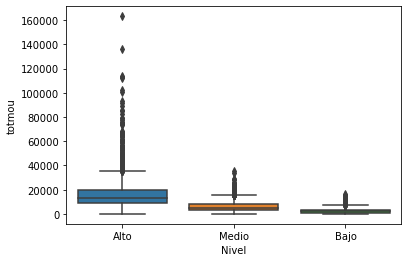

In [20]:
import seaborn as sns 
box_nivel_totmou = sns.boxplot(x="Nivel", y="totmou", data=df_con_etiquetas)

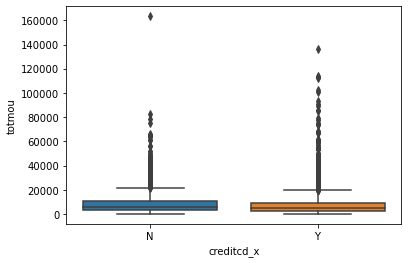

In [21]:
box_creditcd_x_totmou = sns.boxplot(x="creditcd_x", y="totmou", data=df_con_etiquetas)